In [48]:
import pandas as pd

In [49]:
raw_data = pd.read_csv('scout_obleka_deca.csv')
raw_data

,Name,SKU,Original Price,Discount Price,Description,Image URL,Sizes,Colors,URL
0,ADLT SNAPBACK CAP M,ADLT SNAPBACK CAP M RMC191,890.00ден,NaN,Капа изработена од памук,https://www.scout.mk/wp-content/uploads/2024/0...,"['0', '0']","['navy', 'olive']",https://www.scout.mk/product/adlt-snapback-cap...
1,Baseball Cap K 1901012,Baseball Cap K 1901012,"1,290.00ден","1,290.00ден",Капа,https://www.scout.mk/wp-content/uploads/2023/0...,[],['turquoise'],https://www.scout.mk/product/baseball-cap-k-19...
2,Canyon Cap K 1911351,Canyon Cap K 1911351,"1,590.00ден",NaN,Капа со продолжеток за заштита на вратот,https://www.scout.mk/wp-content/uploads/2023/0...,['m'],['pink'],https://www.scout.mk/product/canyon-cap-k-1911...
3,HIGHTON TRS M,HIGHTON TRS M RMJ216,"4,590.00ден",NaN,"Стреч панталони, водоодбивни и брзо сушливи. У...",https://www.scout.mk/wp-content/uploads/2024/0...,"['36', '38']","['black', 'black']",https://www.scout.mk/product/highton-trs-m-rmj...
4,HOT SHOT II,HOT SHOT II,"1,090.00ден",NaN,"Женска детска поларна блуза, халфзип",https://www.scout.mk/wp-content/uploads/2025/0...,"['11', '11', '11', '12', '13', '13', '13', '14...","['grey', 'grey', 'grey', 'navy', 'navy', 'navy...",https://www.scout.mk/product/hot-shot-ii/
5,Kid G Jacket 3H19925,Kid G Jacket 3H19925,"2,990.00ден",NaN,Детски плетен флис со Knit-Tech технологија,https://www.scout.mk/wp-content/uploads/2024/0...,['140'],['pink'],https://www.scout.mk/product/kid-g-jacket-3h19...
6,Kid G Jacket Fix Hood 32Z1105,Kid G Jacket Fix Hood 32Z1105,"4,590.00ден",NaN,Водоотпорна Јакна\nСредно полнета со вештачко ...,https://www.scout.mk/wp-content/uploads/2022/1...,"['110', '128', '140']","['orange', 'orange', 'orange']",https://www.scout.mk/product/kid-g-jacket-fix-...
7,Kid G Jacket Fix Hood 39X7985,Kid G Jacket Fix Hood 39X7985,"3,790.00ден",NaN,"Хардшел Јакна,\nВетроодбивна и водоотпорна јак...",https://www.scout.mk/wp-content/uploads/2023/0...,['128'],['blue'],https://www.scout.mk/product/kid-g-jacket-fix-...
8,Kid G Jacket Fix Hood 3A29385N,Kid G Jacket Fix Hood 3A29385N,"3,990.00ден",NaN,Детска Водоотпорна Софтшел Јакна\nИзработена о...,https://www.scout.mk/wp-content/uploads/2024/0...,"['128', '140', '152', '164']","['blue', 'blue', 'blue', 'blue']",https://www.scout.mk/product/kid-g-jacket-fix-...
9,Kid G Jacket Fix Hood 3H19825,Kid G Jacket Fix Hood 3H19825,"3,490.00ден",NaN,Плетен Флис\nВисоко дишлив и топол,https://www.scout.mk/wp-content/uploads/2024/0...,"['110', '128', '140', '140', '152', '152', '164']","['grey', 'grey', 'grey', 'pink', 'pink', 'pink...",https://www.scout.mk/product/kid-g-jacket-fix-...


In [50]:
raw_data.isnull().sum()

Name               0
SKU                0
Original Price     1
Discount Price    28
Description        0
Image URL          0
Sizes              0
Colors             0
URL                0
dtype: int64

In [51]:
# Drop any row that’s missing either price
# df_drop = raw_data.dropna(subset=['Original Price','Discount Price'])

In [52]:

def clean_price(col):
    return (
        col
        .str.replace(r'[^\d.,]', '', regex=True)   # remove non-digits except dot/comma
        .str.replace(',', '', regex=False)         # remove thousands separator
        .astype(float)
    )

# 2.2 Apply it
raw_data['orig_price'] = clean_price(raw_data['Original Price'])
raw_data['discount_price'] = clean_price(raw_data['Discount Price'])

# 2.3 (Optional) flag “has_discount”
raw_data['has_discount'] = raw_data['discount_price'].notna()


In [53]:
raw_data.isnull().sum()

Name               0
SKU                0
Original Price     1
Discount Price    28
Description        0
Image URL          0
Sizes              0
Colors             0
URL                0
orig_price         1
discount_price    28
has_discount       0
dtype: int64

In [54]:
raw_data['discount_price'] = raw_data['discount_price'].fillna(raw_data['orig_price'])

In [55]:
raw_data.isnull().sum()

Name               0
SKU                0
Original Price     1
Discount Price    28
Description        0
Image URL          0
Sizes              0
Colors             0
URL                0
orig_price         1
discount_price     1
has_discount       0
dtype: int64

In [56]:
raw_data = raw_data.dropna(subset=['orig_price'])

In [57]:
raw_data.isnull().sum()

Name               0
SKU                0
Original Price     0
Discount Price    27
Description        0
Image URL          0
Sizes              0
Colors             0
URL                0
orig_price         0
discount_price     0
has_discount       0
dtype: int64

In [58]:
# completely drop the un-needed original price columns
raw_data = raw_data.drop(columns=['Discount Price'])

In [59]:
raw_data.isnull().sum()

Name              0
SKU               0
Original Price    0
Description       0
Image URL         0
Sizes             0
Colors            0
URL               0
orig_price        0
discount_price    0
has_discount      0
dtype: int64

In [60]:
raw_data = raw_data.drop(columns=['Original Price'])

In [61]:
raw_data.isnull().sum()

Name              0
SKU               0
Description       0
Image URL         0
Sizes             0
Colors            0
URL               0
orig_price        0
discount_price    0
has_discount      0
dtype: int64

In [62]:
raw_data = raw_data.dropna(subset=['Description'])

In [63]:
raw_data.isnull().sum()

Name              0
SKU               0
Description       0
Image URL         0
Sizes             0
Colors            0
URL               0
orig_price        0
discount_price    0
has_discount      0
dtype: int64

In [64]:
import ast

# 4.1 Convert the string-literal to real Python list
raw_data['sizes_list'] = raw_data['Sizes'] \
    .apply(lambda s: ast.literal_eval(s) if pd.notna(s) else [])

raw_data['colors_list'] = raw_data['Colors'] \
    .apply(lambda s: ast.literal_eval(s) if pd.notna(s) else [])

# 4.2 Remove duplicates within each list
raw_data['sizes_list'] = raw_data['sizes_list'].apply(lambda L: sorted(set(L)))
raw_data['colors_list'] = raw_data['colors_list'].apply(lambda L: sorted(set(L)))


In [65]:
# 7.2 Trim whitespace & normalize case
for col in ['Name', 'SKU', 'Description']:
    raw_data[col] = raw_data[col].str.strip()

In [66]:
raw_data.drop('SKU', axis=1, inplace=True)

In [67]:
raw_data.head(1)

,Name,Description,Image URL,Sizes,Colors,URL,orig_price,discount_price,has_discount,sizes_list,colors_list
0,ADLT SNAPBACK CAP M,Капа изработена од памук,https://www.scout.mk/wp-content/uploads/2024/0...,"['0', '0']","['navy', 'olive']",https://www.scout.mk/product/adlt-snapback-cap...,890.0,890.0,False,[0],"[navy, olive]"


In [68]:
raw_data.drop('Sizes', axis=1, inplace=True)
raw_data.drop('Colors', axis=1, inplace=True)

In [69]:
cleaned_data = raw_data.rename(columns={
    'Name'            : 'Име',
    'orig_price'  : 'Цена',
    'discount_price'  : 'Намалена цена',
    'Description'     : 'Опис',
    'Image URL'       : 'Линк до слика на продукт',
    'sizes_list'      : 'Достапни величини',      # or just 'sizes'
    'colors_list'     : 'Достапни бои',     # or just 'colors'
    'URL'             : 'Линк до продукт',
    'has_discount'    : 'Достапен попуст'
}, inplace=False) 

In [70]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Достапен попуст,Достапни величини,Достапни бои
0,ADLT SNAPBACK CAP M,Капа изработена од памук,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/adlt-snapback-cap...,890.0,890.0,False,[0],"[navy, olive]"
1,Baseball Cap K 1901012,Капа,https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/baseball-cap-k-19...,1290.0,1290.0,True,[],[turquoise]
2,Canyon Cap K 1911351,Капа со продолжеток за заштита на вратот,https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/canyon-cap-k-1911...,1590.0,1590.0,False,[m],[pink]
3,HIGHTON TRS M,"Стреч панталони, водоодбивни и брзо сушливи. У...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/highton-trs-m-rmj...,4590.0,4590.0,False,"[36, 38]",[black]
4,HOT SHOT II,"Женска детска поларна блуза, халфзип",https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/hot-shot-ii/,1090.0,1090.0,False,"[11, 12, 13, 14, 5, 7, 9]","[grey, navy, pink, violet, white]"
5,Kid G Jacket 3H19925,Детски плетен флис со Knit-Tech технологија,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-3h19...,2990.0,2990.0,False,[140],[pink]
6,Kid G Jacket Fix Hood 32Z1105,Водоотпорна Јакна\nСредно полнета со вештачко ...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/kid-g-jacket-fix-...,4590.0,4590.0,False,"[110, 128, 140]",[orange]
7,Kid G Jacket Fix Hood 39X7985,"Хардшел Јакна,\nВетроодбивна и водоотпорна јак...",https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3790.0,3790.0,False,[128],[blue]
8,Kid G Jacket Fix Hood 3A29385N,Детска Водоотпорна Софтшел Јакна\nИзработена о...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3990.0,3990.0,False,"[128, 140, 152, 164]",[blue]
9,Kid G Jacket Fix Hood 3H19825,Плетен Флис\nВисоко дишлив и топол,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3490.0,3490.0,False,"[110, 128, 140, 152, 164]","[grey, pink]"


In [71]:
cleaned_data.isnull().sum()

Име                         0
Опис                        0
Линк до слика на продукт    0
Линк до продукт             0
Цена                        0
Намалена цена               0
Достапен попуст             0
Достапни величини           0
Достапни бои                0
dtype: int64

In [72]:
cleaned_data.drop('Достапен попуст', axis=1, inplace=True)

In [73]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Достапни величини,Достапни бои
0,ADLT SNAPBACK CAP M,Капа изработена од памук,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/adlt-snapback-cap...,890.0,890.0,[0],"[navy, olive]"
1,Baseball Cap K 1901012,Капа,https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/baseball-cap-k-19...,1290.0,1290.0,[],[turquoise]
2,Canyon Cap K 1911351,Капа со продолжеток за заштита на вратот,https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/canyon-cap-k-1911...,1590.0,1590.0,[m],[pink]
3,HIGHTON TRS M,"Стреч панталони, водоодбивни и брзо сушливи. У...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/highton-trs-m-rmj...,4590.0,4590.0,"[36, 38]",[black]
4,HOT SHOT II,"Женска детска поларна блуза, халфзип",https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/hot-shot-ii/,1090.0,1090.0,"[11, 12, 13, 14, 5, 7, 9]","[grey, navy, pink, violet, white]"
5,Kid G Jacket 3H19925,Детски плетен флис со Knit-Tech технологија,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-3h19...,2990.0,2990.0,[140],[pink]
6,Kid G Jacket Fix Hood 32Z1105,Водоотпорна Јакна\nСредно полнета со вештачко ...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/kid-g-jacket-fix-...,4590.0,4590.0,"[110, 128, 140]",[orange]
7,Kid G Jacket Fix Hood 39X7985,"Хардшел Јакна,\nВетроодбивна и водоотпорна јак...",https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3790.0,3790.0,[128],[blue]
8,Kid G Jacket Fix Hood 3A29385N,Детска Водоотпорна Софтшел Јакна\nИзработена о...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3990.0,3990.0,"[128, 140, 152, 164]",[blue]
9,Kid G Jacket Fix Hood 3H19825,Плетен Флис\nВисоко дишлив и топол,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3490.0,3490.0,"[110, 128, 140, 152, 164]","[grey, pink]"


In [74]:
# Add a new column named "Валута" with every row = "МКД"
cleaned_data['Валута'] = 'МКД'

In [75]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Достапни величини,Достапни бои,Валута
0,ADLT SNAPBACK CAP M,Капа изработена од памук,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/adlt-snapback-cap...,890.0,890.0,[0],"[navy, olive]",МКД
1,Baseball Cap K 1901012,Капа,https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/baseball-cap-k-19...,1290.0,1290.0,[],[turquoise],МКД
2,Canyon Cap K 1911351,Капа со продолжеток за заштита на вратот,https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/canyon-cap-k-1911...,1590.0,1590.0,[m],[pink],МКД
3,HIGHTON TRS M,"Стреч панталони, водоодбивни и брзо сушливи. У...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/highton-trs-m-rmj...,4590.0,4590.0,"[36, 38]",[black],МКД
4,HOT SHOT II,"Женска детска поларна блуза, халфзип",https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/hot-shot-ii/,1090.0,1090.0,"[11, 12, 13, 14, 5, 7, 9]","[grey, navy, pink, violet, white]",МКД
5,Kid G Jacket 3H19925,Детски плетен флис со Knit-Tech технологија,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-3h19...,2990.0,2990.0,[140],[pink],МКД
6,Kid G Jacket Fix Hood 32Z1105,Водоотпорна Јакна\nСредно полнета со вештачко ...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/kid-g-jacket-fix-...,4590.0,4590.0,"[110, 128, 140]",[orange],МКД
7,Kid G Jacket Fix Hood 39X7985,"Хардшел Јакна,\nВетроодбивна и водоотпорна јак...",https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3790.0,3790.0,[128],[blue],МКД
8,Kid G Jacket Fix Hood 3A29385N,Детска Водоотпорна Софтшел Јакна\nИзработена о...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3990.0,3990.0,"[128, 140, 152, 164]",[blue],МКД
9,Kid G Jacket Fix Hood 3H19825,Плетен Флис\nВисоко дишлив и топол,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3490.0,3490.0,"[110, 128, 140, 152, 164]","[grey, pink]",МКД


In [76]:
cols = cleaned_data.columns.tolist()
cols

['Име',
 'Опис',
 'Линк до слика на продукт',
 'Линк до продукт',
 'Цена',
 'Намалена цена',
 'Достапни величини',
 'Достапни бои',
 'Валута']

In [77]:
cols.remove('Валута')

In [78]:
pos = cols.index('Намалена цена') + 1

In [79]:
cols.insert(pos, 'Валута')

In [80]:
cleaned_data = cleaned_data[cols]

In [81]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Валута,Достапни величини,Достапни бои
0,ADLT SNAPBACK CAP M,Капа изработена од памук,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/adlt-snapback-cap...,890.0,890.0,МКД,[0],"[navy, olive]"
1,Baseball Cap K 1901012,Капа,https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/baseball-cap-k-19...,1290.0,1290.0,МКД,[],[turquoise]
2,Canyon Cap K 1911351,Капа со продолжеток за заштита на вратот,https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/canyon-cap-k-1911...,1590.0,1590.0,МКД,[m],[pink]
3,HIGHTON TRS M,"Стреч панталони, водоодбивни и брзо сушливи. У...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/highton-trs-m-rmj...,4590.0,4590.0,МКД,"[36, 38]",[black]
4,HOT SHOT II,"Женска детска поларна блуза, халфзип",https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/hot-shot-ii/,1090.0,1090.0,МКД,"[11, 12, 13, 14, 5, 7, 9]","[grey, navy, pink, violet, white]"
5,Kid G Jacket 3H19925,Детски плетен флис со Knit-Tech технологија,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-3h19...,2990.0,2990.0,МКД,[140],[pink]
6,Kid G Jacket Fix Hood 32Z1105,Водоотпорна Јакна\nСредно полнета со вештачко ...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/kid-g-jacket-fix-...,4590.0,4590.0,МКД,"[110, 128, 140]",[orange]
7,Kid G Jacket Fix Hood 39X7985,"Хардшел Јакна,\nВетроодбивна и водоотпорна јак...",https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3790.0,3790.0,МКД,[128],[blue]
8,Kid G Jacket Fix Hood 3A29385N,Детска Водоотпорна Софтшел Јакна\nИзработена о...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3990.0,3990.0,МКД,"[128, 140, 152, 164]",[blue]
9,Kid G Jacket Fix Hood 3H19825,Плетен Флис\nВисоко дишлив и топол,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3490.0,3490.0,МКД,"[110, 128, 140, 152, 164]","[grey, pink]"


In [82]:
# if there are **no** NaNs in 'Намалена цена'
cleaned_data['Намалена цена'] = cleaned_data['Намалена цена'].astype(int)
cleaned_data['Цена'] = cleaned_data['Цена'].astype(int)

In [83]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Валута,Достапни величини,Достапни бои
0,ADLT SNAPBACK CAP M,Капа изработена од памук,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/adlt-snapback-cap...,890,890,МКД,[0],"[navy, olive]"
1,Baseball Cap K 1901012,Капа,https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/baseball-cap-k-19...,1290,1290,МКД,[],[turquoise]
2,Canyon Cap K 1911351,Капа со продолжеток за заштита на вратот,https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/canyon-cap-k-1911...,1590,1590,МКД,[m],[pink]
3,HIGHTON TRS M,"Стреч панталони, водоодбивни и брзо сушливи. У...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/highton-trs-m-rmj...,4590,4590,МКД,"[36, 38]",[black]
4,HOT SHOT II,"Женска детска поларна блуза, халфзип",https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/hot-shot-ii/,1090,1090,МКД,"[11, 12, 13, 14, 5, 7, 9]","[grey, navy, pink, violet, white]"
5,Kid G Jacket 3H19925,Детски плетен флис со Knit-Tech технологија,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-3h19...,2990,2990,МКД,[140],[pink]
6,Kid G Jacket Fix Hood 32Z1105,Водоотпорна Јакна\nСредно полнета со вештачко ...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/kid-g-jacket-fix-...,4590,4590,МКД,"[110, 128, 140]",[orange]
7,Kid G Jacket Fix Hood 39X7985,"Хардшел Јакна,\nВетроодбивна и водоотпорна јак...",https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3790,3790,МКД,[128],[blue]
8,Kid G Jacket Fix Hood 3A29385N,Детска Водоотпорна Софтшел Јакна\nИзработена о...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3990,3990,МКД,"[128, 140, 152, 164]",[blue]
9,Kid G Jacket Fix Hood 3H19825,Плетен Флис\nВисоко дишлив и топол,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3490,3490,МКД,"[110, 128, 140, 152, 164]","[grey, pink]"


In [84]:
cleaned_data.to_csv('scout_obleka_deca_cleaned.csv', index=False)

In [85]:
cleaned_data_csv = pd.read_csv('scout_obleka_deca_cleaned.csv')
cleaned_data_csv

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Валута,Достапни величини,Достапни бои
0,ADLT SNAPBACK CAP M,Капа изработена од памук,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/adlt-snapback-cap...,890,890,МКД,['0'],"['navy', 'olive']"
1,Baseball Cap K 1901012,Капа,https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/baseball-cap-k-19...,1290,1290,МКД,[],['turquoise']
2,Canyon Cap K 1911351,Капа со продолжеток за заштита на вратот,https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/canyon-cap-k-1911...,1590,1590,МКД,['m'],['pink']
3,HIGHTON TRS M,"Стреч панталони, водоодбивни и брзо сушливи. У...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/highton-trs-m-rmj...,4590,4590,МКД,"['36', '38']",['black']
4,HOT SHOT II,"Женска детска поларна блуза, халфзип",https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/hot-shot-ii/,1090,1090,МКД,"['11', '12', '13', '14', '5', '7', '9']","['grey', 'navy', 'pink', 'violet', 'white']"
5,Kid G Jacket 3H19925,Детски плетен флис со Knit-Tech технологија,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-3h19...,2990,2990,МКД,['140'],['pink']
6,Kid G Jacket Fix Hood 32Z1105,Водоотпорна Јакна\nСредно полнета со вештачко ...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/kid-g-jacket-fix-...,4590,4590,МКД,"['110', '128', '140']",['orange']
7,Kid G Jacket Fix Hood 39X7985,"Хардшел Јакна,\nВетроодбивна и водоотпорна јак...",https://www.scout.mk/wp-content/uploads/2023/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3790,3790,МКД,['128'],['blue']
8,Kid G Jacket Fix Hood 3A29385N,Детска Водоотпорна Софтшел Јакна\nИзработена о...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3990,3990,МКД,"['128', '140', '152', '164']",['blue']
9,Kid G Jacket Fix Hood 3H19825,Плетен Флис\nВисоко дишлив и топол,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/kid-g-jacket-fix-...,3490,3490,МКД,"['110', '128', '140', '152', '164']","['grey', 'pink']"


In [86]:
import pandas as pd
import ast, json

In [87]:
stand_data = pd.read_csv('scout_obleka_mazhi_cleaned.csv')

In [88]:
print("COLUMNS:", stand_data.columns.tolist())

COLUMNS: ['Име', 'Опис', 'Линк до слика на продукт', 'Линк до продукт', 'Цена', 'Намалена цена', 'Валута', 'Достапни величини', 'Достапни бои']


In [89]:
stand_data['sizes_list'] = stand_data['Достапни величини'].apply(ast.literal_eval)
stand_data['colors_list'] = stand_data['Достапни бои'].apply(ast.literal_eval)

In [90]:
stand_data['std_sizes']  = stand_data['sizes_list'].apply(lambda L: [s.strip().upper() for s in L])
stand_data['std_colors'] = stand_data['colors_list'].apply(lambda L: [c.strip().lower() for c in L])

In [91]:
def make_attributes(row):
    return {
        "опис":            row['Опис'],
        "линк_слика":      row['Линк до слика на продукт'],  # or adjust to 'Линк до слика на продукт'
        "линк_продукт":    row['Линк до продукт'],
        "цена":            row['Цена'],
        "намалена_цена":   row['Намалена цена'],
        "валута":          row['Валута'],
        "величини":        row['std_sizes'],
        "бои":             row['std_colors']
    }

In [92]:
stand_data['attributes']      = stand_data.apply(make_attributes, axis=1)
stand_data['attributes_json'] = stand_data['attributes'].apply(lambda d: json.dumps(d, ensure_ascii=False))

In [93]:
print(stand_data[['Име','attributes_json']].head())

                                     Име  \
0               1960 Logo T-shirt F87313   
1     Abisko Lite Fleece Half Zip F87113   
2       Abisko Lite Fleece Jacket F86971   
3  Abisko Lite Trekking Trousers F82890R   
4    Abisko Lite Trekking Zip-off F81535   

                                     attributes_json  
0  {"опис": "Лесна маичка изработена од органски ...  
1  {"опис": "Лесен и удобен флис со полупатент.",...  
2  {"опис": "Лесен флис што се пакува, совршен за...  
3  {"опис": "Лесни, дишливи панталони со патент о...  
4  {"опис": "Лесни, дишливи панталони со патент о...  


In [94]:
print(stand_data[['Достапни величини','attributes_json']].head())

       Достапни величини                                    attributes_json
0             ['m', 's']  {"опис": "Лесна маичка изработена од органски ...
1  ['l', 'm', 's', 'xl']  {"опис": "Лесен и удобен флис со полупатент.",...
2       ['l', 'm', 'xl']  {"опис": "Лесен флис што се пакува, совршен за...
3                 ['56']  {"опис": "Лесни, дишливи панталони со патент о...
4     ['50', '52', '54']  {"опис": "Лесни, дишливи панталони со патент о...


In [95]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [96]:
def safe_parse_list(x):
    try:
        # Прво обид со literal_eval
        return ast.literal_eval(x)
    except Exception:
        # Ако не успее, ако е низ стринг сaо запирки, распарси така:
        if isinstance(x, str) and ',' in x:
            return [el.strip() for el in x.split(',') if el.strip()]
        # Ако е празно или нешто друго, врати празен список
        return []

In [97]:
cleaned_data['sizes_list']  = cleaned_data['Достапни величини'].apply(safe_parse_list)
cleaned_data['colors_list'] = cleaned_data['Достапни бои'].apply(safe_parse_list)

# 3. Број на елементи во list колоните
cleaned_data['count_sizes']  = cleaned_data['sizes_list'].apply(len)
cleaned_data['count_colors'] = cleaned_data['colors_list'].apply(len)

# 4. Пресметка на апсолутен попуст (ако веќе не е директно даден)
cleaned_data['discount_abs'] = cleaned_data['Цена'] - cleaned_data['Намалена цена']

# 5. Помошна функција за прикажување
def show():
    plt.tight_layout()
    plt.show()


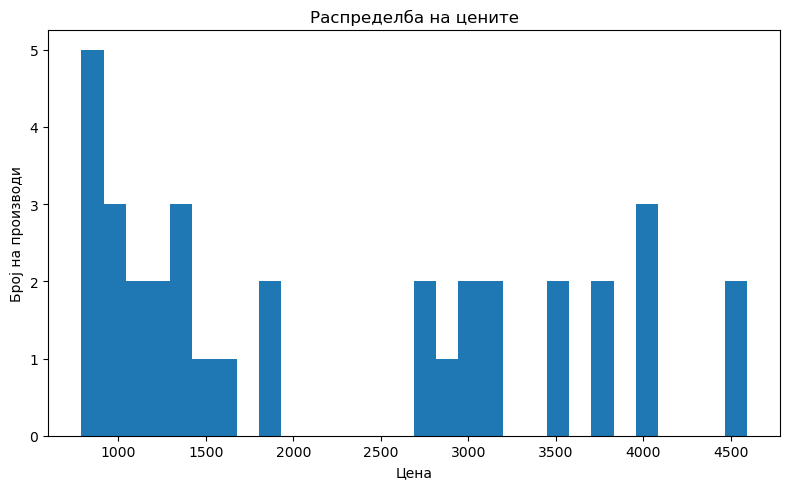

In [98]:
# A. Хистограм на Цена
plt.figure(figsize=(8,5))
plt.hist(cleaned_data['Цена'].dropna(), bins=30)
plt.title('Распределба на цените')
plt.xlabel('Цена')
plt.ylabel('Број на производи')
show()

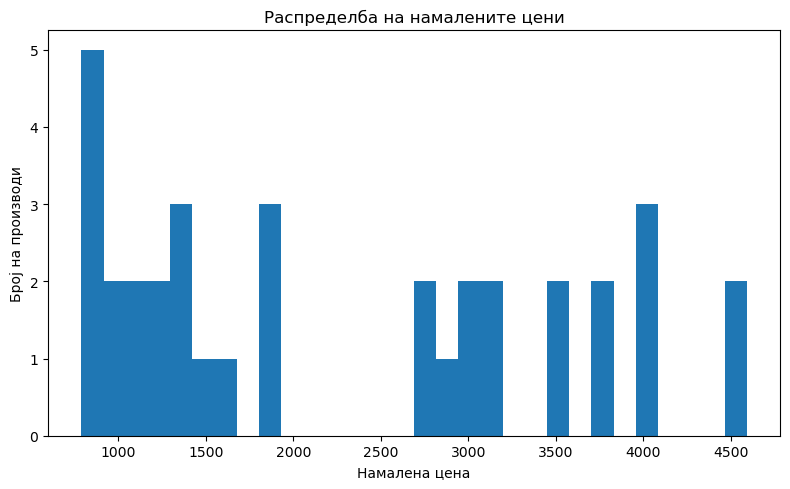

In [99]:
# B. Хистограм на Намалена цена
plt.figure(figsize=(8,5))
plt.hist(cleaned_data['Намалена цена'].dropna(), bins=30)
plt.title('Распределба на намалените цени')
plt.xlabel('Намалена цена')
plt.ylabel('Број на производи')
show()

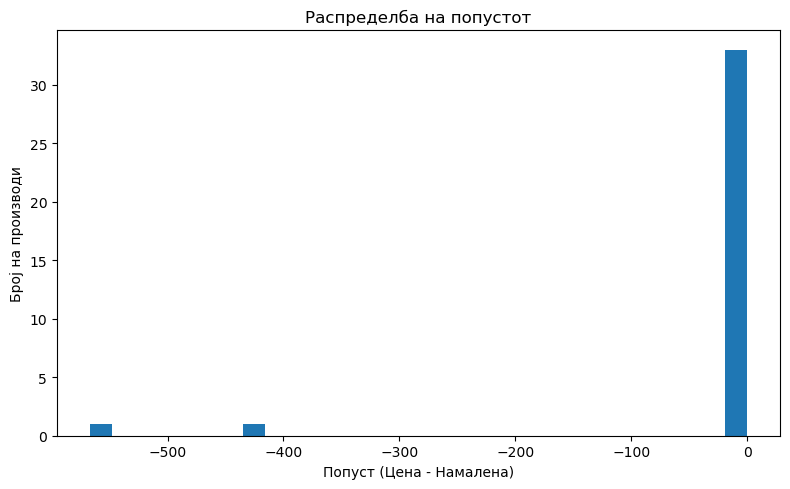

In [100]:
# C. Хистограм на Апсолутен попуст
plt.figure(figsize=(8,5))
plt.hist(cleaned_data['discount_abs'].dropna(), bins=30)
plt.title('Распределба на попустот')
plt.xlabel('Попуст (Цена - Намалена)')
plt.ylabel('Број на производи')
show()

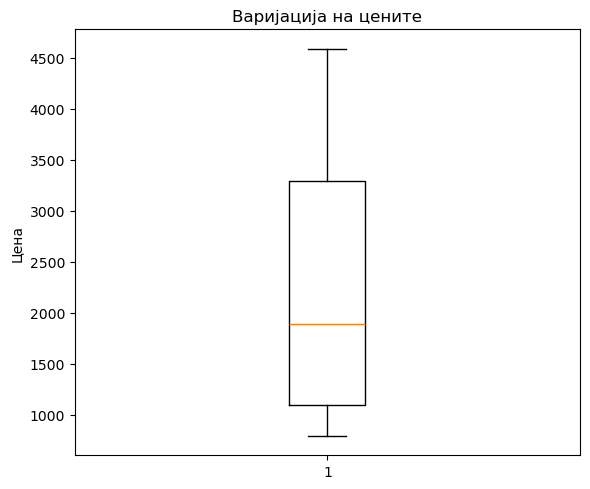

In [101]:
# Бокс-плот на Цена
plt.figure(figsize=(6,5))
plt.boxplot(cleaned_data['Цена'].dropna(), vert=True)
plt.title('Варијација на цените')
plt.ylabel('Цена')
show()

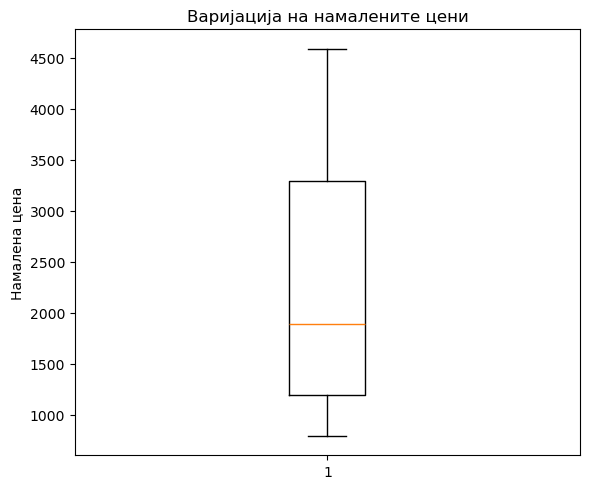

In [102]:
# E. Бокс-плот на Намалена цена
plt.figure(figsize=(6,5))
plt.boxplot(cleaned_data['Намалена цена'].dropna(), vert=True)
plt.title('Варијација на намалените цени')
plt.ylabel('Намалена цена')
show()

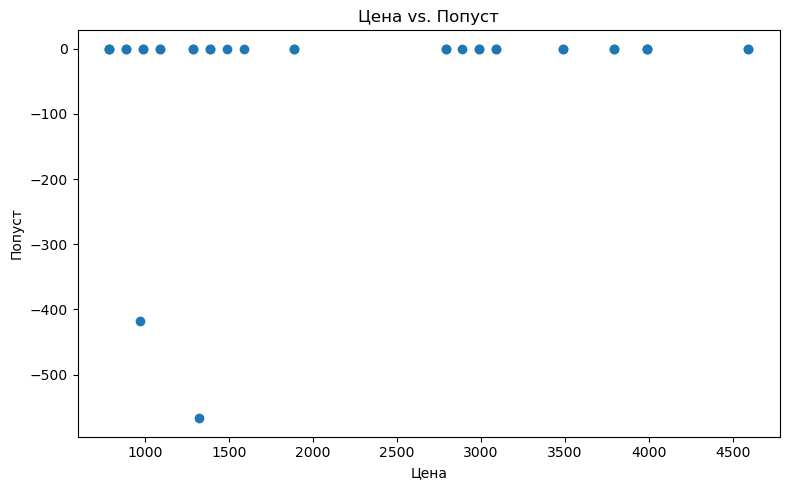

In [103]:
# F. Скатер: Цена vs. Попуст
plt.figure(figsize=(8,5))
plt.scatter(cleaned_data['Цена'], cleaned_data['discount_abs'])
plt.title('Цена vs. Попуст')
plt.xlabel('Цена')
plt.ylabel('Попуст')
show()

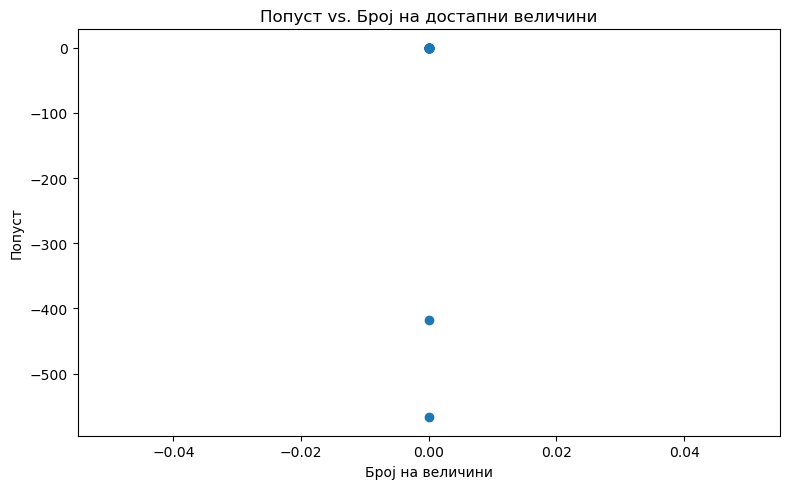

In [104]:
# G. Скатер: Попуст vs. број величини
plt.figure(figsize=(8,5))
plt.scatter(cleaned_data['count_sizes'], cleaned_data['discount_abs'])
plt.title('Попуст vs. Број на достапни величини')
plt.xlabel('Број на величини')
plt.ylabel('Попуст')
show()

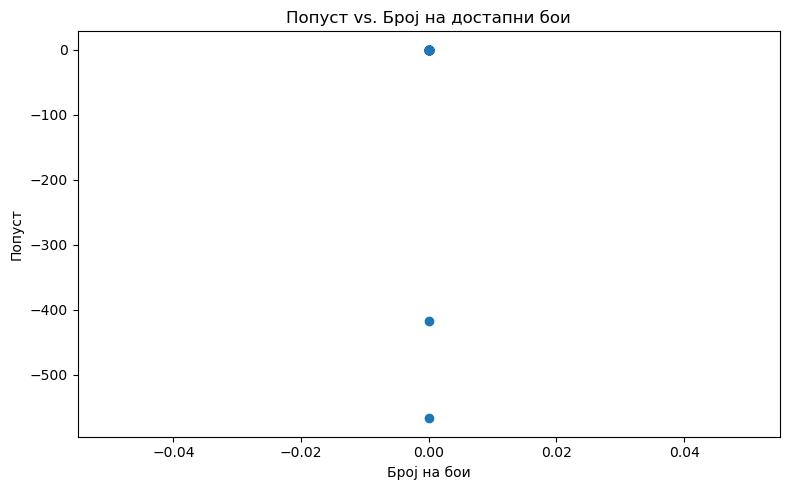

In [105]:
# H. Скатер: Попуст vs. број бои
plt.figure(figsize=(8,5))
plt.scatter(cleaned_data['count_colors'], cleaned_data['discount_abs'])
plt.title('Попуст vs. Број на достапни бои')
plt.xlabel('Број на бои')
plt.ylabel('Попуст')
show()